In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [17]:
# reading csv file

movies_df = pd.read_csv("rename_year_df.csv")


In [18]:
#  sorting data datewise

sorted_movie_df = movies_df.sort_values(by=["Date"])
sorted_movie_df.head()

,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,40000000,89143175,161834276,763,2000
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,65000000,90464773,128884132,351,2000
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,15000000,26437094,47737094,466,2000
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,42000000,23368995,32168970,222,2000
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,13000000,60020107,62464731,102,2000


In [19]:
#  adding new column profit percent in dataframe
sorted_movie_df["Profit Percent"] = round(((sorted_movie_df["Worldwide Gross Income"] - sorted_movie_df["Budget"])/sorted_movie_df["Budget"])*100,2)

# # adding new column Profit in Million ($) in dataframe
sorted_movie_df["Profit in Million ($)"] = (sorted_movie_df["Worldwide Gross Income"] - sorted_movie_df["Budget"])/1000000

# # adding new column Box Office Collectio in Million ($) in dataframe
sorted_movie_df["Box Office Collection in Million ($)"] = sorted_movie_df["Worldwide Gross Income"]/1000000

# # adding new column Budget in Million ($) in dataframe
sorted_movie_df["Budget in Million ($)"] = sorted_movie_df["Budget"]/1000000

# # display the dataframe 
sorted_movie_df.head()


,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year,Profit Percent,Profit in Million ($),Box Office Collection in Million ($),Budget in Million ($)
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,40000000,89143175,161834276,763,2000,304.59,121.834276,161.834276,40.0
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,65000000,90464773,128884132,351,2000,98.28,63.884132,128.884132,65.0
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,15000000,26437094,47737094,466,2000,218.25,32.737094,47.737094,15.0
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,42000000,23368995,32168970,222,2000,-23.41,-9.831030,32.168970,42.0
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,13000000,60020107,62464731,102,2000,380.50,49.464731,62.464731,13.0


# Q1) Movies profit earned is related to their runtime?

    1. Analyise movies box office collections runtime wise

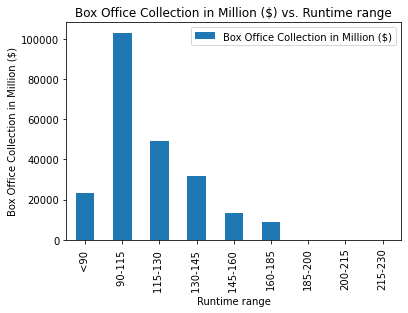

In [20]:
# Create the bins in which Runtime Data will be held
# Bins are 0, 90, 115, 130, 145, 160, 185, 200, 215, 230. 

Bins = [0, 90, 115, 130, 145, 160, 185, 200, 215, 230]

# Create the names for the nine bins

bin_names = [" <90 " , "90-115 ", "115-130 ", "130-145 ", "145-160 ", "160-185", "185-200", "200-215", "215-230"]
sorted_movie_df["Runtime range"] = pd.cut(sorted_movie_df["RunTime"], Bins, labels=bin_names, include_lowest=True)

# # showing bar graph for Runtime Range wise Worldwide Gross Income (Box Office Collection in Million ($))

sorted_movie_df[["Runtime range","Box Office Collection in Million ($)"]].groupby(["Runtime range"]).sum().plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Box Office Collection in Million ($)")
plt.title("Box Office Collection in Million ($) vs. Runtime range")

plt.show()


    2. Classify movies as Flop, Hit, Superhit, Blockbuster etc. based on their profit earned

In [21]:
# Profit percent bins
# Bins are 0, 90, 115, 130, 145, 160, 185, 200, 215, 230. 
Bins = [-100, 0, 100, 200, 400, 2000 ]

# Create the names for the five bins
bin_names = [" Flop " , " Semi Hit ", "Hit ", " Superhit ", "Blockbluster"]
sorted_movie_df["Box Office Report"] = pd.cut(sorted_movie_df["Profit Percent"], Bins, labels=bin_names, include_lowest=True)
sorted_movie_df.head()


,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,...,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year,Profit Percent,Profit in Million ($),Box Office Collection in Million ($),Budget in Million ($),Runtime range,Box Office Report
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,...,89143175,161834276,763,2000,304.59,121.834276,161.834276,40.0,115-130,Superhit
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,...,90464773,128884132,351,2000,98.28,63.884132,128.884132,65.0,115-130,Semi Hit
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,...,26437094,47737094,466,2000,218.25,32.737094,47.737094,15.0,<90,Superhit
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,...,23368995,32168970,222,2000,-23.41,-9.831030,32.168970,42.0,90-115,Flop
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,...,60020107,62464731,102,2000,380.50,49.464731,62.464731,13.0,<90,Superhit


    3. Ploting number of movies runtime range wise

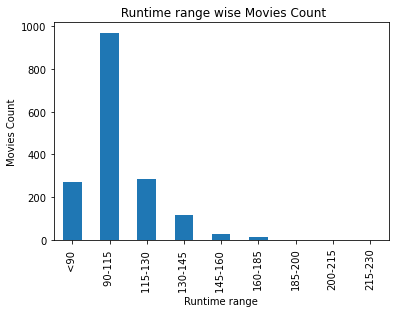

In [22]:
# # gropby dataframe on runtime

movie_group_df = sorted_movie_df.groupby("Runtime range")

# # counting the no. of movies
movies_count = movie_group_df["Movie ID"].count()

# # showing bar graph for runtime range wise movies count 
movies_count.plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Movies Count")
plt.title(" Runtime range wise Movies Count")
plt.show()

    4. Analyise profit% based based on movies runtime

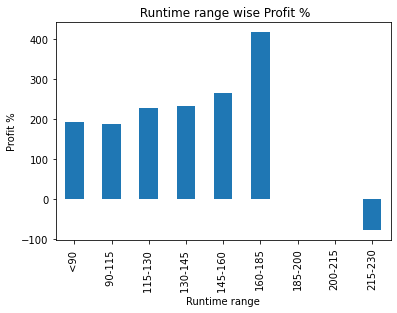

In [23]:
# # showing bar graph for runtime range wise profit %.

runtimegrp_prof_sum = sorted_movie_df[["Runtime range","Profit in Million ($)"]].groupby(["Runtime range"]).sum()
# runtimegrp_prof_sum
runtimegrp_budge_sum = sorted_movie_df[["Runtime range","Budget in Million ($)"]].groupby(["Runtime range"]).sum()
# runtimegrp_budge_sum
runtime_profit_per = (runtimegrp_prof_sum["Profit in Million ($)"]/runtimegrp_budge_sum["Budget in Million ($)"])*100
runtime_profit_per.plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Profit %")
plt.title(" Runtime range wise Profit %")
plt.show()


    5. Finding Correlation between runtime and profitability

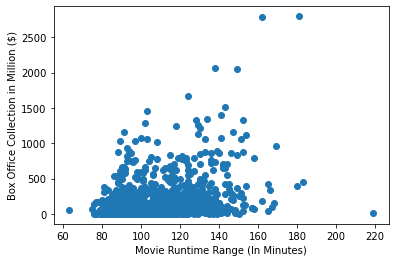

The correlation coefficient between Movie RunTime and Box Office Collection is 0.3


In [24]:
runtimes = sorted_movie_df["RunTime"]
income = sorted_movie_df["Box Office Collection in Million ($)"]
plt.scatter(runtimes,income)
plt.xlabel("Movie Runtime Range (In Minutes)")
plt.ylabel("Box Office Collection in Million ($)")
plt.show()

# Calculate the correlation coefficient between Movie RunTime and Box Office Collection
print(f"The correlation coefficient between Movie RunTime and Box Office Collection is {round(st.pearsonr(runtimes,income)[0],2)}")


*Conclusion - The runtime and worldwide income has a very low corelation

    6. Segregating dataframs based on box office results

In [12]:
flops = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Flop "]
semi_hits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Semi Hit "]
hits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == "Hit "]
superhits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Superhit "]
blockblusters = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == "Blockbluster"]


In [12]:
# # Checking no. for flops, semi-hits, hits, superhits, and blockbusters
len(flops) #434
len(semi_hits) #341
len(hits) # 285
len(superhits) # 314
len(blockblusters) # 279


279

In [26]:
# Biggest Blocbusters(Movie of the year) for 2000-2020

blockbuster_summ = sorted_movie_df[["Date","Year","Title","Director","Genre","Actors","Box Office Collection in Million ($)","Profit Percent"]].loc[sorted_movie_df.groupby("Year")["Box Office Collection in Million ($)"].idxmax()]
# blockbuster_summ.max("Box Office Collectio in Million ($)")
blockbuster_summ.reset_index().head()


,index,Date,Year,Title,Director,Genre,Actors,Box Office Collection in Million ($),Profit Percent
0,1671,2000-06-15,2000,Dinosaur,"Eric Leighton, Ralph Zondag",Animation,Alfre Woodard,349.822765,174.37
1,1624,2001-06-15,2001,Shrek,"Andrew Adamson, Vicky Jenson",Animation,Mike Myers,487.769799,712.95
2,1489,2002-07-06,2002,Spider-Man,Sam Raimi,Action,Tobey Maguire,825.025036,493.54
3,1470,2003-05-23,2003,The Matrix Reloaded,"Lana Wachowski, Lilly Wachowski",Action,Ray Anthony,741.847890,394.57
4,1338,2004-12-17,2004,Shrek 2,"Andrew Adamson, Kelly Asbury",Animation,Mike Myers,928.760770,519.17


    7. line graph showing the the trend of biggest blockbuster movies box office collection through out these years(2000-2020)

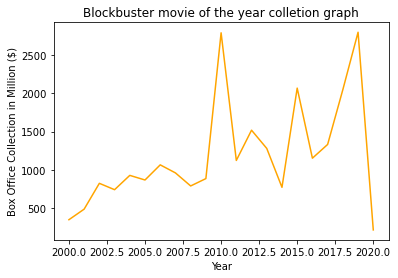

In [72]:
x_axis_data = blockbuster_summ["Year"]
points = blockbuster_summ["Box Office Collection in Million ($)"]
plt.plot(x_axis_data, points,color="orange")
plt.xlabel("Year")
plt.ylabel("Box Office Collection in Million ($)")
plt.title("Blockbuster movie of the year colletion graph")

plt.show()

    8. Most sucessful Actors and Directors for 2000-2020.


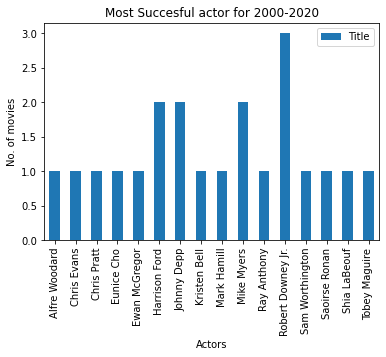

In [28]:
blockbuster_summ[["Title","Actors"]].groupby("Actors").count().plot.bar()
plt.xlabel("Actors")
plt.ylabel("No. of movies")
plt.title("Most Succesful actor for 2000-2020")
plt.show()

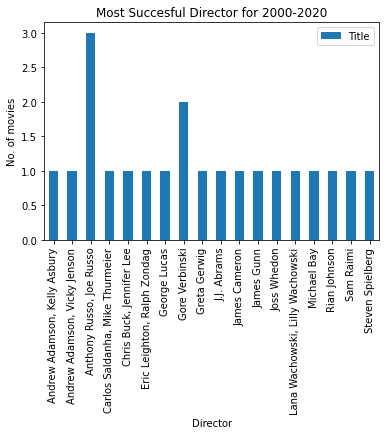

In [36]:
blockbuster_summ[["Title","Director"]].groupby("Director").count().plot.bar()
plt.xlabel("Director")
plt.ylabel("No. of movies")
plt.title("Most Succesful Director for 2000-2020")
plt.show()

#    7) Does the movie release time affects the profitability?

    1. Analysing the release time of the Biggest blockbluster(Movies of the year) movies 

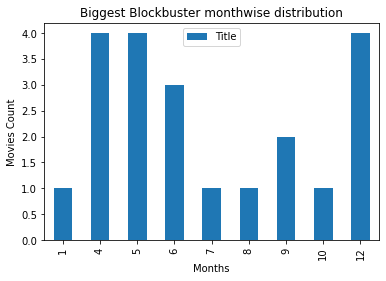

In [51]:
# Biggest Blockbluster release time - (Month distribution)

blockbuster_summ["Date"] = pd.to_datetime(blockbuster_summ["Date"])
blockbuster_summ["Quarter"] = blockbuster_summ["Date"].dt.quarter
blockbuster_summ["Month"] = blockbuster_summ["Date"].dt.month
x = blockbuster_summ[["Title","Month"]].groupby("Month").count()
x.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Biggest Blockbuster monthwise distribution")
plt.show()

# blockbuster_summ.dtypes

    2. Analysing the release time of the Blockbuster movies 

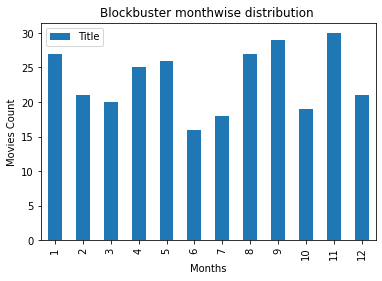

In [48]:
# Blockbusters release time -(month distribution)

blockblusters["Date"] = pd.to_datetime(blockblusters["Date"])
blockblusters["Month"] = blockblusters["Date"].dt.month
y = blockblusters[["Title","Month"]].groupby("Month").count()
y.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Blockbuster monthwise distribution ")

plt.show()

    3. Analysing the release time of the Flop movies 

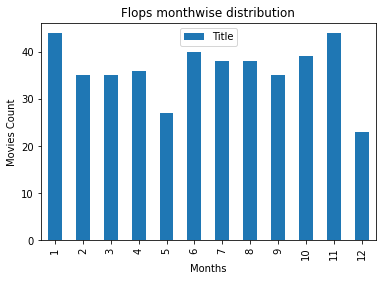

In [50]:
# Flop release time -(month distribution)

flops["Date"] = pd.to_datetime(flops["Date"])
flops["Quarter"] = flops["Date"].dt.quarter
flops["Month"] = flops["Date"].dt.month
z = flops[["Title","Month"]].groupby("Month").count()
z.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Flops monthwise distribution")
plt.show()


    4. Analysing Biggest blockbuster, blockbuster and flop movies monthwise count through line graph

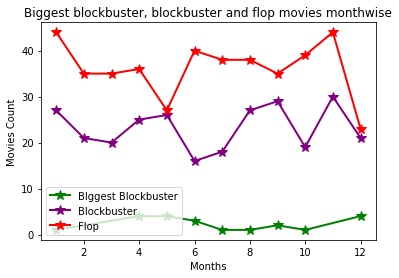

In [70]:
plt.plot(x,linewidth=2, markersize=10,marker="*",color="green", label="BIggest Blockbuster")
plt.plot(y,linewidth=2, markersize=10,marker="*",color="purple", label="Blockbuster")
plt.plot(z,linewidth=2, markersize=10,marker="*",color="red", label="Flop")

plt.title("Biggest blockbuster, blockbuster and flop movies monthwise")
plt.xlabel("Months")
plt.ylabel("Movies Count")

plt.legend(loc="best")

plt.show()